In [1]:
import matplotlib.pyplot as plt
import random
import math

In [2]:
class UndirectedGraph:
    def __init__(self, num_vertices=None):
        self.graph = {}
        self.num_vertices = num_vertices
        self.edgeCount = 0
        self.nodeCount = 0
        if num_vertices:
            for i in range(1,self.num_vertices+1):
                self.graph[i] = list()

    def addNode(self, node):
        if self.num_vertices is not None and (node < 1 or node > self.num_vertices):
            raise Exception("Node index cannot exceed the number of nodes")
        self.graph[node] = list()
        self.nodeCount += 1

    def addEdge(self, node1, node2):
        if node1 not in self.graph:
            self.addNode(node1)
        if node2 not in self.graph:
            self.addNode(node2)

        self.graph[node1].append(node2)
        self.graph[node2].append(node1)
        self.edgeCount += 1

    def __add__(self, other):
        new_graph = UndirectedGraph(self.num_vertices)
        
        # Copy existing graph
        new_graph.graph = {node: neighbors.copy() for node, neighbors in self.graph.items()}
        new_graph.edgeCount = self.edgeCount
        new_graph.nodeCount = self.nodeCount

        # Modify the new graph based on the type of 'other'
        if type(other) == int:
            new_graph.addNode(other)
        elif type(other) == tuple:
            new_graph.addEdge(other[0], other[1])

        return new_graph

    def __str__(self) -> str:
        result = f"Graph with {self.nodeCount if not self.num_vertices else self.num_vertices} nodes and {self.edgeCount} edges. Neighbours of the nodes are belows:\n"

        for node, neighbors in self.graph.items():
            result += f"Node {node}: {{{', '.join(map(str, neighbors))}}}\n"

        return result

    def plotDegDist(self):
        degrees = [len(neighbors) for neighbors in self.graph.values()]
        total_nodes = len(degrees)

        # Count occurrences of each degree
        degree_counts = {degree: degrees.count(degree) for degree in set(degrees)}

        # Add 0 for degrees that don't exist
        for i in range(0, self.num_vertices):
            if i not in degree_counts:
                degree_counts[i] = 0


        # Calculate fraction of nodes for each degree
        x_values = list(degree_counts.keys())

        # print(degree_counts)
        y_values = [count / total_nodes for count in degree_counts.values()]

        # Add 0 for degrees that don't exist
        # y_values += [0.0] * (self.num_vertices - len(x_values))
        # while self.num_vertices != len(x_values):
        #     x_values.append(len(x_values))
            
            
        # Calculate average node degree
        average_degree = sum(degrees) / total_nodes

        # Plot degree distribution with points
        plt.scatter(x_values, y_values, s=15, color='blue', label='Actual degree distribution')
        plt.axvline(x=average_degree, color='red', linewidth=2, label='Avg. node degree')

        plt.title("Node Degree Distribution")
        plt.xlabel("Node Degree")
        plt.ylabel("Fraction of Nodes")
        plt.legend()
        plt.grid()
        plt.show()
    
    def isConnected(self):
        if not self.graph:
            return False

        start_node = next(iter(self.graph))
        visited = set()
        queue = [start_node]
        visited.add(start_node)

        # Perform BFS
        while queue:
            current_node = queue.pop(0)
            for neighbor in self.graph[current_node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        # If all nodes are visited, the graph is connected
        return len(visited) == len(self.graph)
    
    def oneTwoComponentSizes(self):
        if not self.graph:
            return 0, 0

        visited = set()
        largest_component_size = 0
        second_largest_component_size = 0

        for node in self.graph:
            if node not in visited:
                queue = [node]
                visited.add(node)
                component_size = 1

                while queue:
                    current_node = queue.pop(0)
                    for neighbor in self.graph[current_node]:
                        if neighbor not in visited:
                            visited.add(neighbor)
                            queue.append(neighbor)
                            component_size += 1

                # Update component sizes
                if component_size > largest_component_size:
                    second_largest_component_size = largest_component_size
                    largest_component_size = component_size
                elif component_size > second_largest_component_size:
                    second_largest_component_size = component_size

        return largest_component_size, second_largest_component_size



In [3]:
class ERRandomGraph(UndirectedGraph):
    def __init__(self, n):
        super().__init__(n)

    def sample(self, p):
        for i in range(1, self.num_vertices + 1):
            for j in range(i + 1, self.num_vertices + 1):
                if random.random() < p:
                    self.addEdge(i, j)


In [4]:
g = UndirectedGraph(6)
g = g + (1, 2)
g = g + (3, 4)
g = g + (6, 4)
a,b = g.oneTwoComponentSizes()
print(g.oneTwoComponentSizes())

(3, 2)


In [5]:
g = ERRandomGraph(100)
g.sample(0.01)
print(g.oneTwoComponentSizes())

(22, 8)


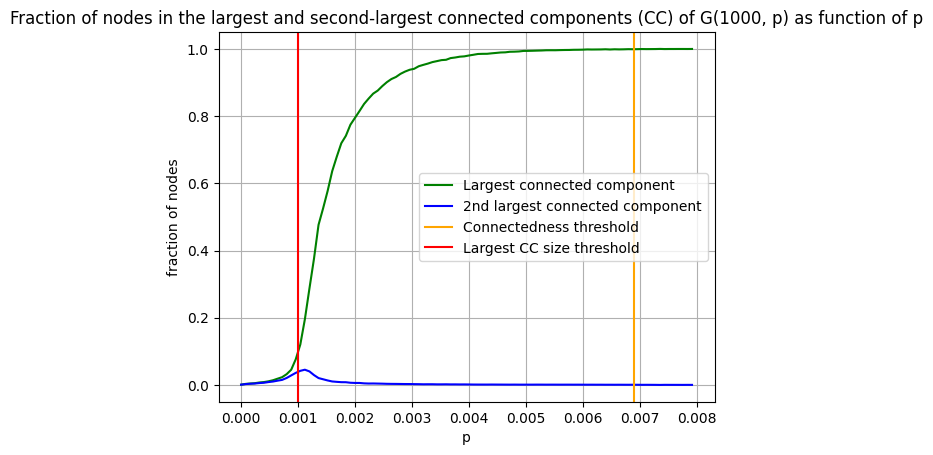

In [14]:
from IPython.display import display, clear_output

def verify():
    p = []
    theorp1 = math.log(1000)/1000   #2nd largest connected component
    theorp2 = 0.001   #Largest CC size threshold
    y1 = []
    y2 = []
    i  = 0


    


    while i<=0.008:
        count=0
        p.append(i)
        avg1=[]
        avg2=[]

        for k in range(50):
            g = ERRandomGraph(1000)
            g.sample(i)
            t = g.oneTwoComponentSizes()
            avg1.append(t[0])
            avg2.append(t[1])

        i += 0.00008
        
        y1.append((sum(avg1)/len(avg1))/1000)  #For largest
        y2.append((sum(avg2)/len(avg2))/1000)  #For second largest


        plt.plot(p,y1,color='g',label='Largest connected component')
        plt.plot(p,y2,color='b',label='2nd largest connected component')
        plt.axvline(x = theorp1,color = 'orange',label = 'Connectedness threshold')
        plt.axvline(x = theorp2,color = 'r',label = 'Largest CC size threshold')
        plt.title('Fraction of nodes in the largest and second-largest connected components (CC) of G(1000, p) as function of p')
        plt.xlabel('p')
        plt.ylabel('fraction of nodes')
        plt.grid()
        plt.legend()
        plt.show()
        clear_output(wait=True)

verify()
